In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

path = '/content/gdrive/My Drive/Colab Notebooks/folium/PROYECCIONES_POBLACI_N_-_Poblaci_n_por_municipio_y_departamento.csv'
df = pd.read_csv(path)
df = df.dropna()

Edad = []
for i in range(0,len(df)):
  index = df['gruposdeedad'].iloc[i].find('-')
  if index != -1:
    a = b = num = 0
    a = float(df['gruposdeedad'].iloc[i][(index+1):])
    b = float(df['gruposdeedad'].iloc[i][:index])
    num = (a+b)/2.
    Edad.append(num)
  else:
    index1 = df['gruposdeedad'].iloc[i].find('Y')
    if index1 != -1:
      Edad.append(82)
    else:
       Edad.append('Total')

df['edad'] = Edad
dk = df[df.edad == 'Total']
df = df[df.edad != 'Total']
dff = df.drop('gruposdeedad', axis=1)
dff = dff.drop('total', axis=1)

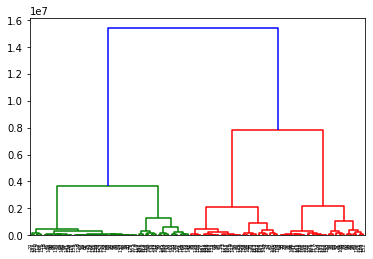

In [0]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
X = dff.to_numpy()
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

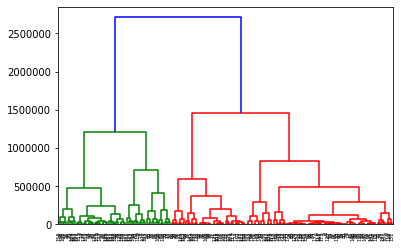

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

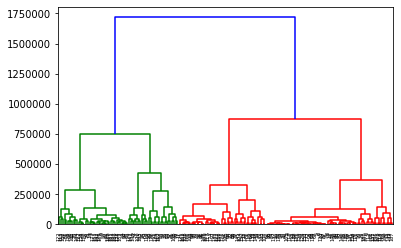

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

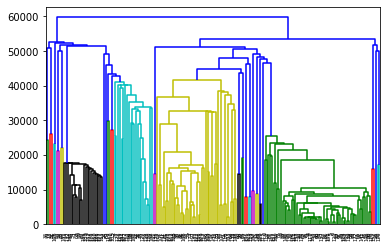

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

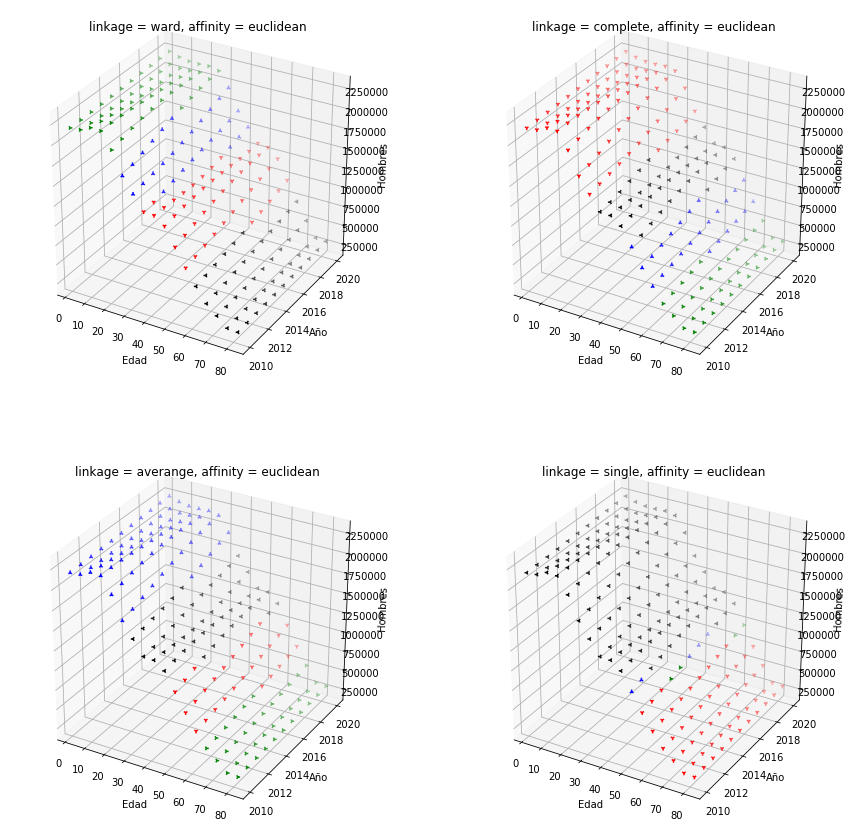

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221, projection='3d')

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_


ax.scatter(list(X[labels==0, 3]), list(X[labels==0, 0]), list(X[labels==0, 1]), c='red', marker='1')
ax.scatter(list(X[labels==1, 3]), list(X[labels==1, 0]), list(X[labels==1, 1]), c='blue', marker='2')
ax.scatter(list(X[labels==2, 3]), list(X[labels==2, 0]), list(X[labels==2, 1]), c='black', marker='3')
ax.scatter(list(X[labels==3, 3]), list(X[labels==3, 0]), list(X[labels==3, 1]), c='green', marker='4')


ax.set_xlabel('Edad')
ax.set_ylabel('Año')
ax.set_zlabel('Hombres')
ax.set_title('linkage = ward, affinity = euclidean')

ax = fig.add_subplot(222, projection='3d')

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_


ax.scatter(list(X[labels==0, 3]), list(X[labels==0, 0]), list(X[labels==0, 1]), c='red', marker='1')
ax.scatter(list(X[labels==1, 3]), list(X[labels==1, 0]), list(X[labels==1, 1]), c='blue', marker='2')
ax.scatter(list(X[labels==2, 3]), list(X[labels==2, 0]), list(X[labels==2, 1]), c='black', marker='3')
ax.scatter(list(X[labels==3, 3]), list(X[labels==3, 0]), list(X[labels==3, 1]), c='green', marker='4')


ax.set_xlabel('Edad')
ax.set_ylabel('Año')
ax.set_zlabel('Hombres')
ax.set_title('linkage = complete, affinity = euclidean')

ax = fig.add_subplot(223, projection='3d')

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_


ax.scatter(list(X[labels==0, 3]), list(X[labels==0, 0]), list(X[labels==0, 1]), c='red', marker='1')
ax.scatter(list(X[labels==1, 3]), list(X[labels==1, 0]), list(X[labels==1, 1]), c='blue', marker='2')
ax.scatter(list(X[labels==2, 3]), list(X[labels==2, 0]), list(X[labels==2, 1]), c='black', marker='3')
ax.scatter(list(X[labels==3, 3]), list(X[labels==3, 0]), list(X[labels==3, 1]), c='green', marker='4')


ax.set_xlabel('Edad')
ax.set_ylabel('Año')
ax.set_zlabel('Hombres')
ax.set_title('linkage = averange, affinity = euclidean')


ax = fig.add_subplot(224, projection='3d')

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_


ax.scatter(list(X[labels==0, 3]), list(X[labels==0, 0]), list(X[labels==0, 1]), c='red', marker='1')
ax.scatter(list(X[labels==1, 3]), list(X[labels==1, 0]), list(X[labels==1, 1]), c='blue', marker='2')
ax.scatter(list(X[labels==2, 3]), list(X[labels==2, 0]), list(X[labels==2, 1]), c='black', marker='3')
ax.scatter(list(X[labels==3, 3]), list(X[labels==3, 0]), list(X[labels==3, 1]), c='green', marker='4')


ax.set_xlabel('Edad')
ax.set_ylabel('Año')
ax.set_zlabel('Hombres')
ax.set_title('linkage = single, affinity = euclidean')
fig.savefig('/content/gdrive/My Drive/Colab Notebooks/folium/pob1.png')
plt.show()

In [0]:
import matplotlib.ticker as ticker
mark = list(set(df['gruposdeedad']))
gk = df.groupby('gruposdeedad')
mark.sort()

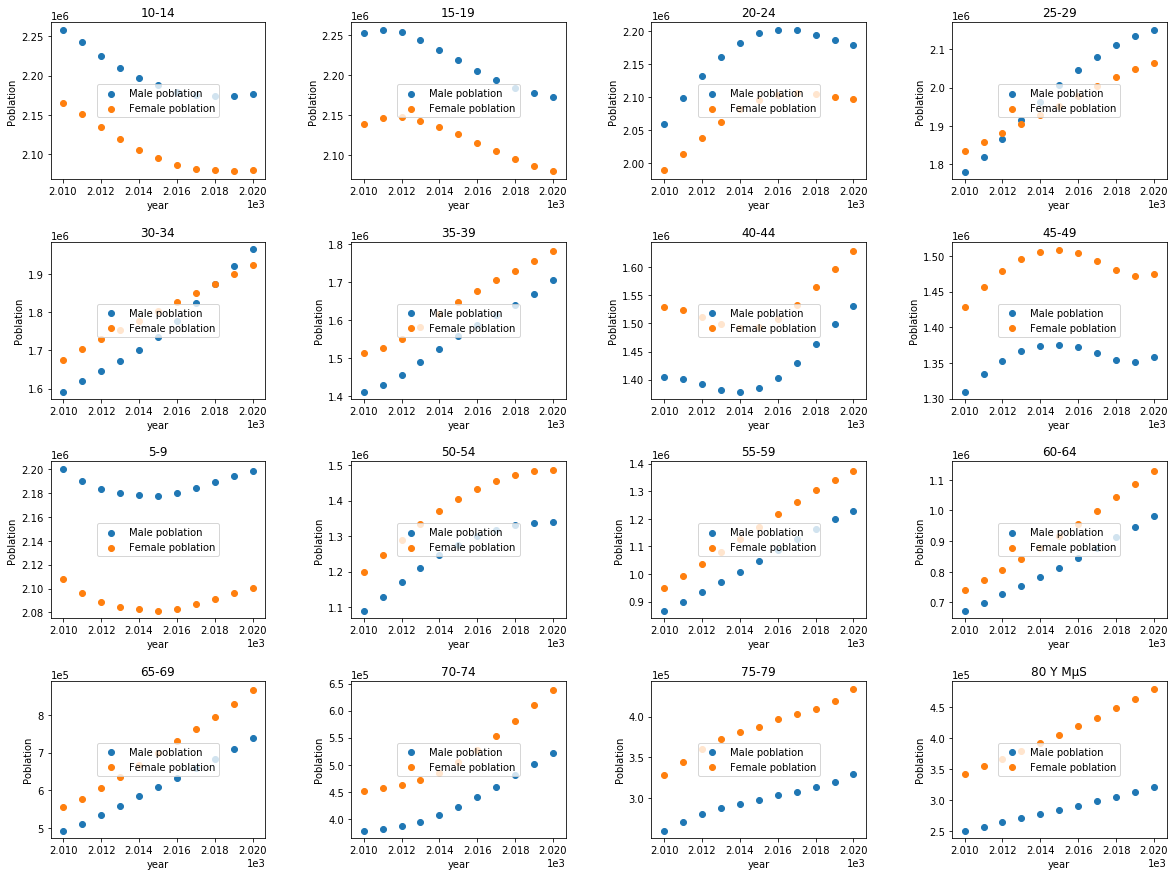

In [0]:
fig = plt.figure(figsize=(20, 15))


for i in range(1, 17):
  plt.subplot(4, 4, i)
  dg = gk.get_group(mark[i])
  plt.scatter(dg['year'], dg['hombres'],label='Male poblation')
  plt.scatter(dg['year'], dg['mujeres'], label='Female poblation')
  plt.legend(loc='center')
  plt.title(mark[i])
  plt.xlabel('year')
  plt.ylabel('Poblation')
  plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
  plt.subplots_adjust(hspace=0.4, wspace = 0.4)

fig.savefig('/content/gdrive/My Drive/Colab Notebooks/folium/pob2.png')

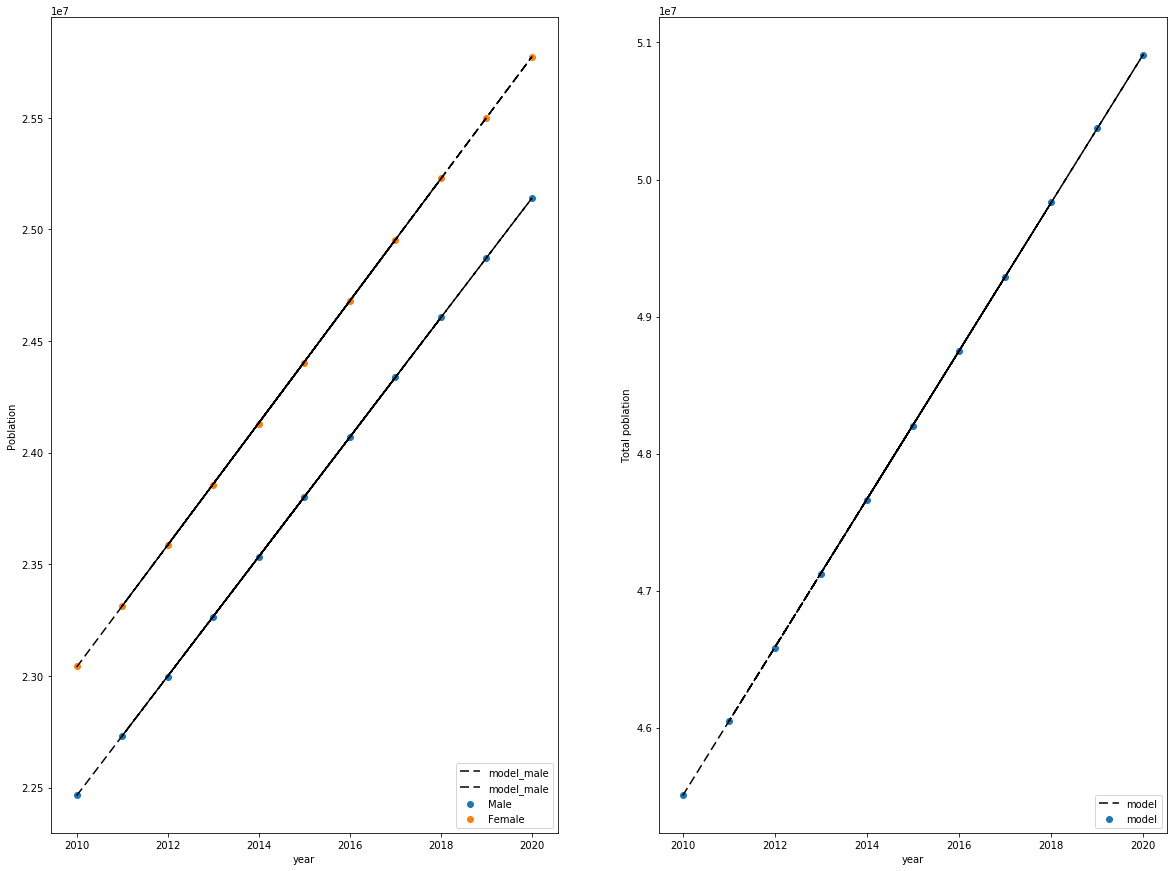

In [225]:
from sklearn import linear_model
fig = plt.figure(figsize=(20, 15))
regr = linear_model.LinearRegression()

plt.subplot(1, 2, 1)

regr.fit(dk['year'].to_numpy()[:, np.newaxis], dk['hombres'].to_numpy()[:, np.newaxis])
y_pred = regr.predict(dk['year'].to_numpy()[:, np.newaxis])
regr.fit(dk['year'].to_numpy()[:, np.newaxis], dk['mujeres'].to_numpy()[:, np.newaxis])
y_pred2 = regr.predict(dk['year'].to_numpy()[:, np.newaxis])

plt.scatter(dk['year'],dk['hombres'], label = 'Male')
plt.scatter(dk['year'],dk['mujeres'], label = 'Female')
plt.plot(dk['year'].to_numpy()[:, np.newaxis],y_pred, dashes=[6, 3], color="Black", label = 'model_male')
plt.plot(dk['year'].to_numpy()[:, np.newaxis],y_pred2, dashes=[6, 3], color="Black", label = 'model_male')
plt.xlabel('year')
plt.ylabel('Poblation')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)

regr.fit(dk['year'].to_numpy()[:, np.newaxis], dk['total'].to_numpy()[:, np.newaxis])
y_pred = regr.predict(dk['year'].to_numpy()[:, np.newaxis])
plt.scatter(dk['year'],dk['total'], label = 'model')
plt.plot(dk['year'].to_numpy()[:, np.newaxis],y_pred, dashes=[6, 3], color="Black", label = 'model')
plt.xlabel('year')
plt.ylabel('Total poblation')
plt.legend(loc='lower right')


fig.savefig('/content/gdrive/My Drive/Colab Notebooks/folium/pob3.png')